In [39]:
# find all files named "sensitive_ds_info.csv" in the current directory and all subdirectories
# and print the path to each file

import os
from posixpath import dirname

fs = []
for root, dirs, files in os.walk("/home/ubuntu/src/DSA_github/benchmarks/mitigation"):
    for file in files:
        if file == "sensitive_ds_info.csv":
            p = os.path.join(root, file)
            if "play" in p:
                continue
            fs.append(p)

info = {}
for file_name in fs:
    with open(file_name, 'r') as f:
        dir_name = os.path.dirname(file_name)
        bench_name = "/".join(dir_name.split("/")[-2:])
        file_info = {}
        info[bench_name] = file_info
        for line in f:
            splits = line.split(',')
            var = splits[2]
            size = splits[1]
            key = (var, size, bench_name)
            file_info[key] = 1 if key not in file_info else file_info[key] + 1


In [55]:
red = 224+257+1+62+512
all = sum([count for k,v in info.items() for _, count in v.items()])
print(red, all, red/all)

1056 15762 0.06699657403882756


(array([512.,   0., 449.,   0.,   0.,   0.,   0.,   0.,  33.,   0.,   0.,
          0.,   4.,  12.,   4.,  14.,   4.,   8.,  12.,   6.]),
 array([0.125  , 0.16875, 0.2125 , 0.25625, 0.3    , 0.34375, 0.3875 ,
        0.43125, 0.475  , 0.51875, 0.5625 , 0.60625, 0.65   , 0.69375,
        0.7375 , 0.78125, 0.825  , 0.86875, 0.9125 , 0.95625, 1.     ]),
 <BarContainer object of 20 artists>)

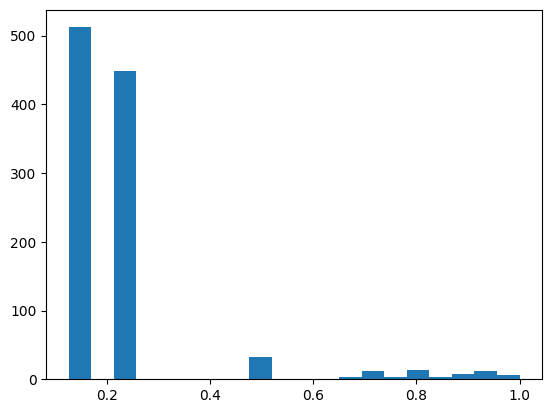

In [54]:
reduction = [1/2]*8 + [1/4]*32 + [1/4]*96 + [1/2]*24 + [1/4]*64 + [1/4]*257 + [1/2]*1 + [32/256]*512 + [511/748]*4 + [524/748]*4 + [535/748]*2 + [539/748]*4 + [540/748]*2 + [557/748]*2 + [584/748]*2 + [595/748]*4 + [598/748]*4 + [608/748]*2 + [610/748]*4 + [621/748]*2 + [646/748]*2 + [657/748]*2 + [669/748]*2 + [678/748]*2 + [680/748]*2 + [687/748]*2 + [688/748]*2 + [693/748]*2 + [703/748]*6 + [725/748]*2 + [747/748]*2 + [748/748]*2
# plot histogram of the reduction
import matplotlib.pyplot as plt
plt.hist(reduction, bins=20)